In [1]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
%matplotlib inline

In [2]:
# read in etopo5 topography/bathymetry.
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)

# get variable (ROSE), lat and lon
topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)

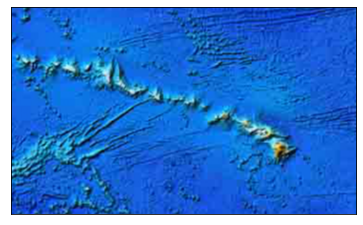

In [3]:
# make plot

# create the figure and axes instances
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# setup of basemap; note here that each projection has a different set of arguments
#  see https://matplotlib.org/basemap/users/mapsetup.html for details
#  1) 'merc' = mercator projection
#  2) define region to be Hawaiian Islands; "merc" projection takes the corners
#     of the map as lower left corner latitude and longitude (llcrnrlat,llcrnrlon)
#     and upper right corner latitude and longitude (urcrnrlat,urcrnrlon)
#  3) lat_ts is the latitude of true scale; just define this as midpoint
#  4) resolution is like GMT low (l), crude (c), high (h), full (f)
lon1 = -175.0
lat1 = 15.0
lon2 = -150.0
lat2 = 30.0
lat_ts = ( lat2 - lat1) / 2.0

# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap( llcrnrlon = lon1, llcrnrlat = lat1, urcrnrlon = lon2, urcrnrlat = lat2,\
             lat_ts = lat_ts, resolution = 'l', ax = ax )
#            rsphere=(6378137.00,6356752.3142),\
#            resolution='l',area_thresh=1000.,projection='lcc',\
#            lat_1=20.,lon_0=-162.,ax=ax)
m.etopo()

In [4]:
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap( llcrnrlon = lon1, llcrnrlat = lat1, urcrnrlon = lon2, urcrnrlat = lat2,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=20.,lon_0=-162.,ax=ax)
# display the image

# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)

# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)

# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])

# add colorbar
#cb = m.colorbar(im,"right", size="5%", pad='2%')
#ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')

{190.0: ([<matplotlib.lines.Line2D at 0x2b945bfa5750>],
  [Text(541711.5293530293, -25769.991324936967, '170°W')])}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


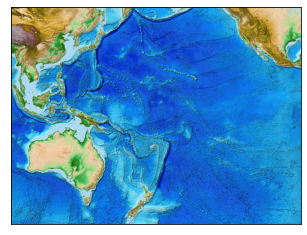

In [6]:
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=-40,lat_2=60,lat_0=0,lon_0=180)
m.etopo()